In [1]:
from google.colab import files
uploaded = files.upload()

Saving haberman.csv to haberman.csv


In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings 
warnings.filterwarnings("ignore") 

haberman =pd.read_csv("haberman.csv")

How many data points and features?

In [18]:
print(haberman.shape)

(306, 4)


What are the column names in our dataset?

In [19]:
print(haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


How many data points for each class are present? 

In [20]:
haberman["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

#2-D scatter plot:

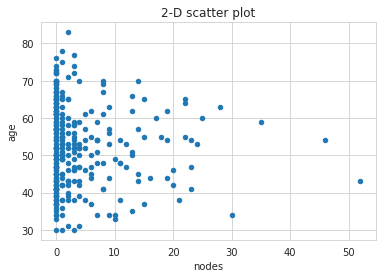

In [24]:
haberman.plot(kind='scatter', x='nodes', y='age');
plt.xlabel("nodes")
plt.ylabel("age")
plt.title("2-D scatter plot")
plt.show()

**OBSERVATION:**

1.By caluclating the number of nodes of a particular age we can estimate the risk factor.

2.where the nodes here represents stage of cancer for paticular person. 

2-D Scatter plot with color-coding for each flower type/class.

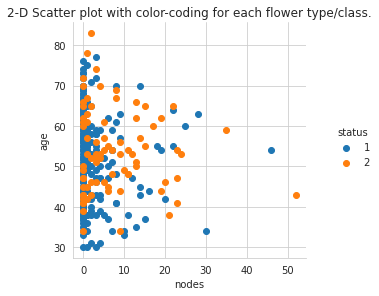

In [26]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", size=4) \
   .map(plt.scatter, "nodes", "age") \
   .add_legend();
plt.title("2-D Scatter plot with color-coding for each flower type/class.")
plt.show();

**Observation:**

1. The count of nodes will let u know about the stages of the person.
more are the number of nodes higher the risk factor.
2. Here blue dots represents survival more than 5 years and orange dots represents survival less than 5 years.

pairwise scatter plot:

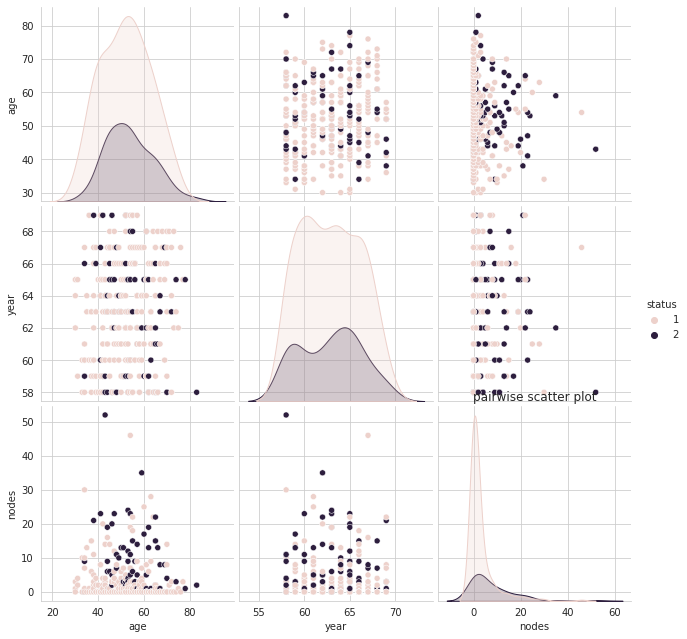

In [27]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="status", size=3, vars=["age","year", "nodes"]);
plt.title("pairwise scatter plot")
plt.show()

**OBSERVATION:**

1. Age and nodes are the most useful data to identify the person in risk.
2. By identifying the number of nodes we can caluclate the stage of cancer for a particular person.
3. We can find "lines" and "if-else" conditions to build a simple model to classify the stages.

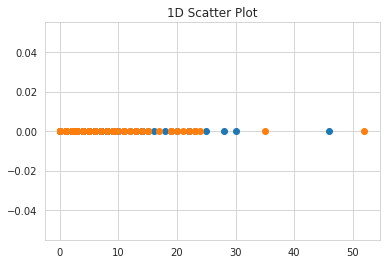

In [29]:
import numpy as np
haberman_Long_Survive = haberman.loc[haberman["status"] == 1];
haberman_Short_Survive = haberman.loc[haberman["status"] == 2];
plt.plot(haberman_Long_Survive["nodes"], np.zeros_like(haberman_Long_Survive["nodes"]), 'o')
plt.plot(haberman_Short_Survive["nodes"], np.zeros_like(haberman_Short_Survive["nodes"]), 'o')
plt.title("1D Scatter Plot")
plt.show()

**OBSERVATION:**

1. I used the Numpy library function to plot 1D scatter plot individually for every classified data.

2. The 1D scatter plot using data feature age and nodes

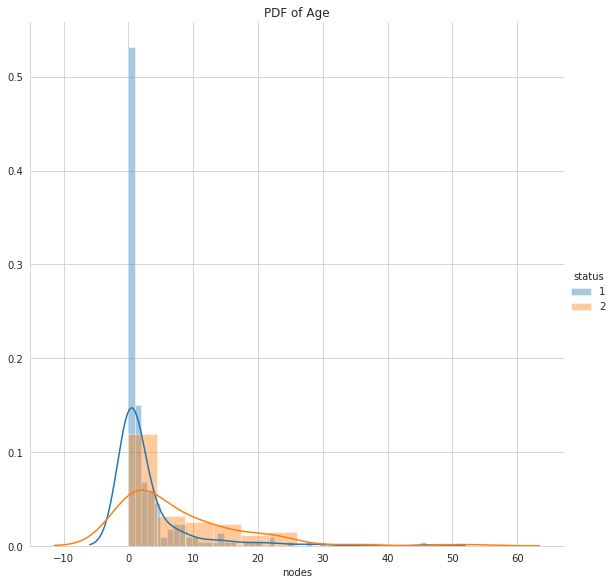

In [33]:
sns.FacetGrid(haberman, hue="status", size=8) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.title("PDF of Age")
plt.show();

**OBSERVATION:**

1. By counting the number of nodes we can divide the phases of a person i.e., stage 1 and stage 2.
2. When there are less numnber of nodes it is noted as stage 1.
3. If there are more number of nodes it is consider to be as stage 2.

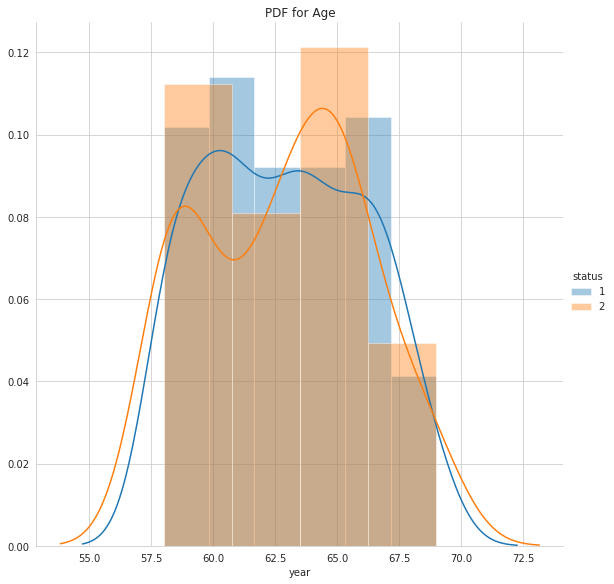

In [34]:
sns.FacetGrid(haberman, hue="status", size=8) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.title("PDF for Age")
plt.show();

**OBSERVATION:**

1. Age is also an another factor which effects the risk factor.
2. Though we have more number of nodes and in less number of years yet it is to be consider to be in the first stage.
3. Though we are hgaving less number of nodes but with more number of years yet it is consider to be second stage.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


Text(0.5, 1.0, 'PDF for nodes')

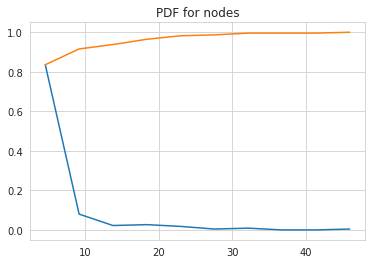

In [35]:
counts, bin_edges = np.histogram(haberman_Long_Survive["nodes"], bins=10, 
 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.title("PDF for nodes")

**OBSEVARION:**
1. We can clearly divide the persons to particular stages either stage 1 or stage 2 at a particular stage.

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


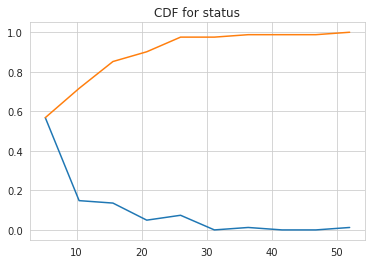

In [36]:
counts, bin_edges = np.histogram(haberman_Short_Survive['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.title("CDF for status")
plt.show();

**OBSERVATION:**

1. Here for the people who are with nodes less than 5 the chances of risk is 55%.
2. Here for the people who are with nodes greater than 40 the changes of risk is 100%.
3. And the people who are with nodes in between 5 t0- 40 would have the risk peccentage of 55% - 100%.

In [ ]:
print("means")
print (np.mean(haberman_Long_Survive["nodes"]))
print (np.mean(np.append(haberman_Long_Survive["nodes"],50)))
print (np.mean(haberman_Short_Survive["nodes"]))
print("\nStandard Deviation:")
print(np.mean(haberman_Long_Survive["nodes"]))
print(np.mean(haberman_Short_Survive["nodes"]))

means
2.7911111111111113
3.0
7.45679012345679

Standard Deviation:
2.7911111111111113
7.45679012345679


In [ ]:
print("Medians:")
print(np.median(haberman_Long_Survive["nodes"]))
print(np.median(np.append(haberman_Long_Survive["nodes"],50)))
print(np.median(haberman_Short_Survive["nodes"]))
print("\nQuantiles:")
print(np.percentile(haberman_Long_Survive["nodes"],np.arange(0,100,25)))
print(np.percentile(haberman_Short_Survive["nodes"],np.arange(0,100,25)))
print("\n90th percentile:")
print(np.percentile(haberman_Long_Survive["nodes"],90))
print(np.percentile(haberman_Short_Survive["nodes"],90))
from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(haberman_Long_Survive["nodes"]))
print(robust.mad(haberman_Short_Survive["nodes"]))

Medians:
0.0
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th percentile:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


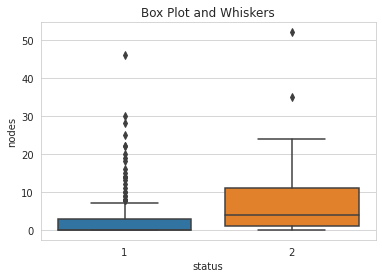

In [37]:
sns.boxplot(x='status',y='nodes', data=haberman)
plt.title("Box Plot and Whiskers")
plt.show()

**OBSERVATION:**

1. 25th percentile and 50th percentile will both have more percentage of survival and threshold for it is 0 to 7.

2. 50th percentile and 75th percentile will both have less percentage of survival and threshold for it is 0 to 25.

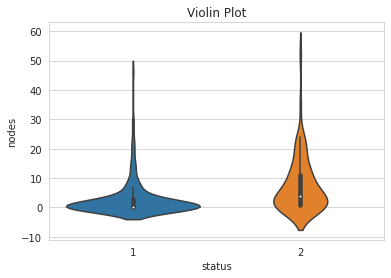

In [38]:
sns.violinplot(x="status", y="nodes",data=haberman)
plt.legend
plt.title("Violin Plot")
plt.show()

**OBSERVATION:**

1. When the thershold values are less i.e., 0-7 we consider to be the stage 1.
2. When the thershold values are more i.e., 0-25 we consider to be the stage 2.

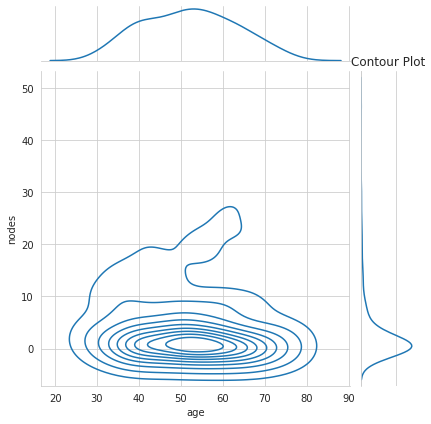

In [39]:
sns.jointplot(x="age",y="nodes",data=haberman_Long_Survive,kind="kde")
plt.grid()
plt.title("Contour Plot")
plt.show()

**OBSERVATION:**

1. Here density of point for long survival is more from age range 47–60 and axillary nodes from 0–3.